# HW 
- Use the cancer data used below (or the first two columns of the iris data set) - for bonus, bring your own data set
- Normalize, test-train split the data
- Train models from SVM (linear and rbf kernels), LogRegression (2 values of C), KNN (3 neighbor values)
- Create two tables, one for train, one for test - that represent the Model, description, Precision, Recall, f1 score on each line
- Pick one of the Models and show the feature importance

In [19]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
import sklearn.preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets, svm, neighbors
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.neighbors import KNeighborsClassifier as KNN

In [20]:
cancer = pd.read_csv('../data/wdbc.data.txt', header=None)

In [21]:
y = (cancer[1]=='M').astype(int)
X = cancer[[*range(2,32)]]
X = sklearn.preprocessing.MinMaxScaler().fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

In [23]:
model = svm.SVC(kernel='linear').fit(X_train, y_train)

precision0,recall0,fscore0,support0 = score(y_train,model.predict(X_train))
precision0a,recall0a,fscore0a,support0a = score(y_test,model.predict(X_test))

In [24]:
model = svm.SVC(kernel='rbf').fit(X_train, y_train)

precision1,recall1,fscore1,support1 = score(y_train,model.predict(X_train))
precision1a,recall1a,fscore1a,support1a = score(y_test,model.predict(X_test))

In [25]:
model = LogReg(C=5).fit(X_train, y_train)

precision2,recall2,fscore2,support2 = score(y_train,model.predict(X_train))
precision2a,recall2a,fscore2a,support2a = score(y_test,model.predict(X_test))

In [26]:
model = LogReg(C=10).fit(X_train, y_train)

precision3,recall3,fscore3,support3 = score(y_train,model.predict(X_train))
precision3a,recall3a,fscore3a,support3a = score(y_test,model.predict(X_test))

In [27]:
model= KNN(n_neighbors=2).fit(X_train, y_train) 

precision4,recall4,fscore4,support4 = score(y_train,model.predict(X_train)) 
precision4a,recall4a,fscore4a,support4a = score(y_test,model.predict(X_test))

In [28]:
model= KNN(n_neighbors=5).fit(X_train, y_train) 

precision5,recall5,fscore5,support5 = score(y_train,model.predict(X_train))
precision5a,recall5a,fscore5a,support5a = score(y_test,model.predict(X_test))

In [29]:
model= KNN(n_neighbors=10).fit(X_train, y_train) 

precision6,recall6,fscore6,support6 = score(y_train,model.predict(X_train)) 
precision6a,recall6a,fscore6a,support6a = score(y_test,model.predict(X_test))

In [30]:
MTrain = pd.DataFrame({'Model':['SVM', 'SVM', 'LogReg', 'LogReg', 'KNN', 'KNN', 'KNN']})

DTrain = pd.DataFrame({'Description':['Linear', 'RBF', 'C = 5', 'C = 10', 'V = 2', 'V = 5', 'V = 10']})

PTrain = pd.DataFrame({'Precision':[np.mean(precision0), np.mean(precision1) , np.mean(precision2) , np.mean(precision3)
                                     , np.mean(precision4), np.mean(precision5), np.mean(precision6)]})

RTrain = pd.DataFrame({'Recall':[np.mean(recall0), np.mean(recall1) , np.mean(recall2) , np.mean(recall3)
                                 , np.mean(recall4), np.mean(recall5), np.mean(recall6)]})

FTrain = pd.DataFrame({'F1 Score':[np.mean(fscore0), np.mean(fscore1) , np.mean(fscore2) , np.mean(fscore3)
                                     , np.mean(fscore4), np.mean(fscore5), np.mean(fscore6)]})

MTrain.join(DTrain).join(PTrain).join(RTrain).join(FTrain)

,Model,Description,Precision,Recall,F1 Score
0,SVM,Linear,0.974026,0.950000,0.960351
1,SVM,RBF,0.939759,0.875000,0.896520
2,LogReg,C = 5,0.986667,0.975000,0.980423
3,LogReg,C = 10,0.993243,0.987500,0.990270
4,KNN,V = 2,0.974026,0.950000,0.960351
5,KNN,V = 5,0.966842,0.955651,0.960845
6,KNN,V = 10,0.962025,0.925000,0.939723


In [31]:
MTest = pd.DataFrame({'Model':['SVM', 'SVM', 'LogReg', 'LogReg', 'KNN', 'KNN', 'KNN']})

DTest = pd.DataFrame({'Description':['Linear', 'RBF', 'C = 5', 'C = 10', 'V = 2', 'V = 5', 'V = 10']})

PTest = pd.DataFrame({'Precision':[np.mean(precision0a), np.mean(precision1a) , np.mean(precision2a) , 
                                   np.mean(precision3a), np.mean(precision4a), np.mean(precision5a), 
                                   np.mean(precision6a)]})

RTest = pd.DataFrame({'Recall':[np.mean(recall0a), np.mean(recall1a) , np.mean(recall2a) , np.mean(recall3a)
                                 , np.mean(recall4a), np.mean(recall5a), np.mean(recall6a)]})

FTest = pd.DataFrame({'F1 Score':[np.mean(fscore0a), np.mean(fscore1a) , np.mean(fscore2a) , np.mean(fscore3a)
                                     , np.mean(fscore4a), np.mean(fscore5a), np.mean(fscore6a)]})

MTest.join(DTest).join(PTest).join(RTest).join(FTest)

,Model,Description,Precision,Recall,F1 Score
0,SVM,Linear,0.959085,0.931379,0.942394
1,SVM,RBF,0.926426,0.857558,0.877241
2,LogReg,C = 5,0.957237,0.932525,0.942555
3,LogReg,C = 10,0.959085,0.931379,0.942394
4,KNN,V = 2,0.938392,0.901695,0.915131
5,KNN,V = 5,0.952572,0.923804,0.935101
6,KNN,V = 10,0.943486,0.906363,0.919981


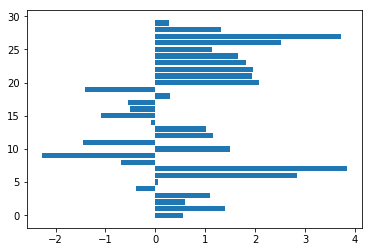

array([ 0.54605905,  1.38456264,  0.59315618,  1.09355572, -0.38361081,
        0.0493463 ,  2.83550109,  3.82831922, -0.69446589, -2.26782763,
        1.48819598, -1.44084306,  1.16253729,  1.01355967, -0.09280612,
       -1.08617277, -0.511771  , -0.55254739,  0.29446763, -1.41988446,
        2.06858347,  1.93122799,  1.94998956,  1.82105096,  1.65909708,
        1.12853839,  2.51525286,  3.70833168,  1.31611876,  0.2775845 ])

In [32]:
model = LogReg(C=10).fit(X_train, y_train)
coef = model.coef_[0]
plt.barh(list(range(coef.shape[0])), coef, align='center')
plt.show()

coef

Concavity and Concave Points are the features have the most influence in this model because they have the highest coefficients.

Ten real-valued features are computed for each cell nucleus:
    a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.